# Mosquito Attraction: Beer vs. Water

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
mosquitos_data = pd.read_csv("../data/mosquitos_data_raw.csv")
mosquitos_data

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


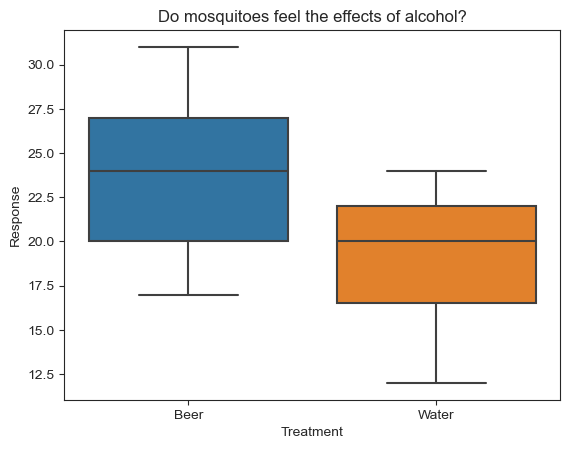

In [4]:
sns.set_style("ticks")
sns.boxplot(x = "Treatment", y = "Response",
            data = mosquitos_data).set_title("Do mosquitoes feel the effects of alcohol?");

The median number of mosquitoes attracted to individuals drinking beer is 24, while the median number of mosquitoes attracted to individuals drinking water is 20.

For the middle 50% of the data, the number of mosquitoes are between 20 and 27 for the group consuming beer and between 16 and 22 for the group consuming water.

There are no distant observations (outliers) for both groups. Max and min numbers for individuals drinking beer are 31 and 17, respectively; max and min numbers for individuals drinking water are significantly lower - 24 and 12, respectively.

Considering that, **beer consumption, as opposed to water consumption, increases attractiveness to mosquitoes**.

In [6]:
mosquitos_data.groupby("Treatment")["Response"].agg(["mean", "median", "std"])

,mean,median,std
Treatment,,,
Beer,23.600000,24.0,4.133199
Water,19.222222,20.0,3.671120


The mean (or average) represents the dataset's central or typical value. On average, about 24 mosquitos are attracted to individuals drinking beer, while the average number of mosquitoes attracted to individuals drinking water is around 19.
The median finds the middle value of a set of observations when ordered from lowest to highest. It separates the higher half of the data from the lower half, 24 and 20, for the beer and water treatments, respectively.
The standard deviation is a measure of how widely values are dispersed from the average value (the mean): 4.13 for individuals drinking beer (23.6 - 4.13 = 19.47 and 23.6 + 4.13 = 27.73) and 3.67 for individuals drinking water (19.22 - 3.67 = 15.55 and 19.22 + 3.67 = 22.89).

In [8]:
beer_consumption = mosquitos_data[mosquitos_data["Treatment"] == "Beer"]
beer_consumption_re = np.array(beer_consumption["Response"])
beer_consumption_re

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27])

In [9]:
beer_consumption_re_len = len(beer_consumption_re)
beer_consumption_re_len

25

In [10]:
water_consumption = mosquitos_data[mosquitos_data["Treatment"] == "Water"]
water_consumption_re = np.array(water_consumption["Response"])
water_consumption_re

array([21, 22, 15, 12, 21, 16, 19, 15, 22, 24, 19, 23, 13, 22, 20, 24, 18,
       20])

In [11]:
water_consumption_re_len = len(water_consumption_re)
water_consumption_re_len

18

In [12]:
beer_water_consumption_re = np.append(beer_consumption_re, water_consumption_re)
beer_water_consumption_re

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20])

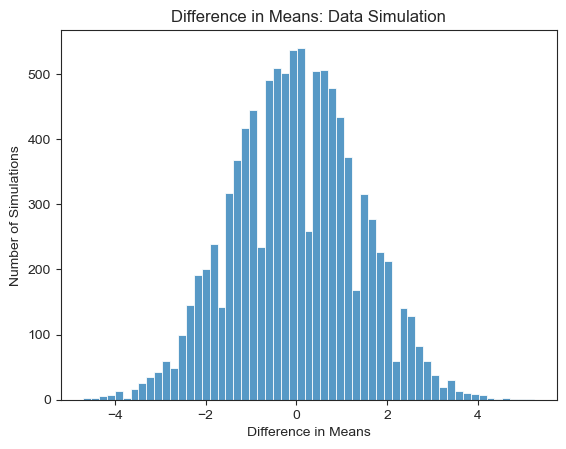

In [13]:
# Initialize an empty list to store the differences in means for each simulation
diffs_in_means_sim = []

# Perform 10,000 simulations
for i in range(10000):
    # Shuffle the combined beer and water consumption data
    np.random.shuffle(beer_water_consumption_re)
    
    # Split the shuffled data into two groups: beer and water, based on their original lengths
    beer_consumption_re_sim = beer_water_consumption_re[:beer_consumption_re_len]
    water_consumption_re_sim = beer_water_consumption_re[beer_consumption_re_len:]
    
    # Calculate the difference in means between the two simulated groups
    diff_in_means_sim = np.mean(beer_consumption_re_sim) - np.mean(water_consumption_re_sim)
    
    # Append the difference in means to the list
    diffs_in_means_sim.append(diff_in_means_sim)

# Create a histogram of the simulated differences in means
sns.histplot(data=diffs_in_means_sim).set(
    title="Difference in Means: Data Simulation",
    xlabel="Difference in Means",
    ylabel="Number of Simulations"
);

The histogram displays the distribution of simulated differences in means between the *Beer* and *Water* groups, derived from 10,000 random shuffles of the combined mosquito response data. The differences cluster symmetrically around 0, forming an approximately normal distribution, which represents the expected outcomes under the null hypothesis (no association between beer consumption and mosquito attraction). The central tendency around 0 indicates that, under randomization, no systematic difference in means is expected. This distribution provides a baseline for comparing the observed difference in means, allowing us to assess whether the observed result is statistically significant or likely due to chance.

In [15]:
# Initialize a counter for the total number of simulations
total_num_of_sim = 0

# Initialize a counter for the number of simulations where the difference in means is greater than or equal to the target value
greater_than_or_equal_to_target_mean_num_of_sim = 0

# Iterate through the simulated differences in means
for diff_in_means_sim in diffs_in_means_sim:
    # Increment the total number of simulations counter
    total_num_of_sim += 1
    
    # Check if the simulated difference in means meets or exceeds the target value (e.g., 4.4)
    if diff_in_means_sim >= 4.4:
        # Increment the counter for simulations meeting the target condition
        greater_than_or_equal_to_target_mean_num_of_sim += 1

# Calculate the proportion of simulations where the difference in means meets or exceeds the target value
result = greater_than_or_equal_to_target_mean_num_of_sim / total_num_of_sim
result

0.0005

The p-value of **0.0005** indicates that there is only a **0.05% chance** of observing a difference in means of 4.4 or greater under the null hypothesis (no association between beer consumption and mosquito attraction). This extremely low probability suggests the observed difference is highly unlikely to be due to random chance, providing strong evidence to **reject the null hypothesis**. Thus, the result indicates a **statistically significant association** between beer consumption and mosquito attraction.